Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Assignment 8.1 : Saving Models**
**Name** | Gamundoy, Jon Aviv Cloydd S.
**Section** | CPE32S3
**Date Performed**: | 4/17/2024
**Date Submitted**: | 4/18/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

# Choosing a Dataset and Problem Analysis

## Loading the Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# fetch dataset
rice = fetch_ucirepo(id=545)

# data (as pandas dataframes)
data = pd.DataFrame(rice.data.original)

## Problem Analysis

Dataset is obtained through [UCI Learning](https://archive.ics.uci.edu/dataset/863/maternal+health+risk).

The dataset contains information about features of rice and aims to identify which kind it is (Cammeo or Osmanick)

Below is the features and short description
- Area | Returns the number of pixels within the boundaries of the rice grain
- Perimeter | Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain
- Major_Axis_length | The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives
- Minor_Axis_lenght | The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives
- Eccentricity | It measures how round the ellipse, which has the same moments as the rice grain, is
- Convex_Area | Returns the pixel count of the smallest convex shell of the region formed by the rice grain
- Extent | Returns the ratio of the region formed by the rice grain to the bounding box
- Class | Cammeo and Osmancik

## Dataset Contents and Statistics

In [ ]:
data.head(20)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


# Data Pre-processing

## Data Transformation

In [ ]:
features = data.columns.difference(['Class'])
features

Index(['Area', 'Convex_Area', 'Eccentricity', 'Extent', 'Major_Axis_Length',
       'Minor_Axis_Length', 'Perimeter'],
      dtype='object')

We will now transform the data into the appropriate data type using Label Encoder

In [ ]:
data["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing

# Initiate label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode categorical data
data["Class"] = label_encoder.fit_transform(data["Class"])

# Check
data["Class"].value_counts()

Class
1    2180
0    1630
Name: count, dtype: int64

In [ ]:
for item in data.columns:
  data[f"{item}"] = data[f"{item}"].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   float64
dtypes: float64(8)
memory usage: 238.2 KB


In [ ]:
data.head(20)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0.0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0.0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0.0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0.0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0.0
5,13479.0,477.015991,200.053055,86.650291,0.901328,13786.0,0.657897,0.0
6,15757.0,509.281006,207.296677,98.336136,0.880323,16150.0,0.589708,0.0
7,16405.0,526.570007,221.612518,95.436707,0.902521,16837.0,0.658888,0.0
8,14534.0,483.640991,196.650818,95.050682,0.875429,14932.0,0.649651,0.0
9,13485.0,471.570007,198.272644,87.727287,0.896789,13734.0,0.572320,0.0


In [ ]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


Now we will move to removing the outliers in our dataset

## Removal of Outliers

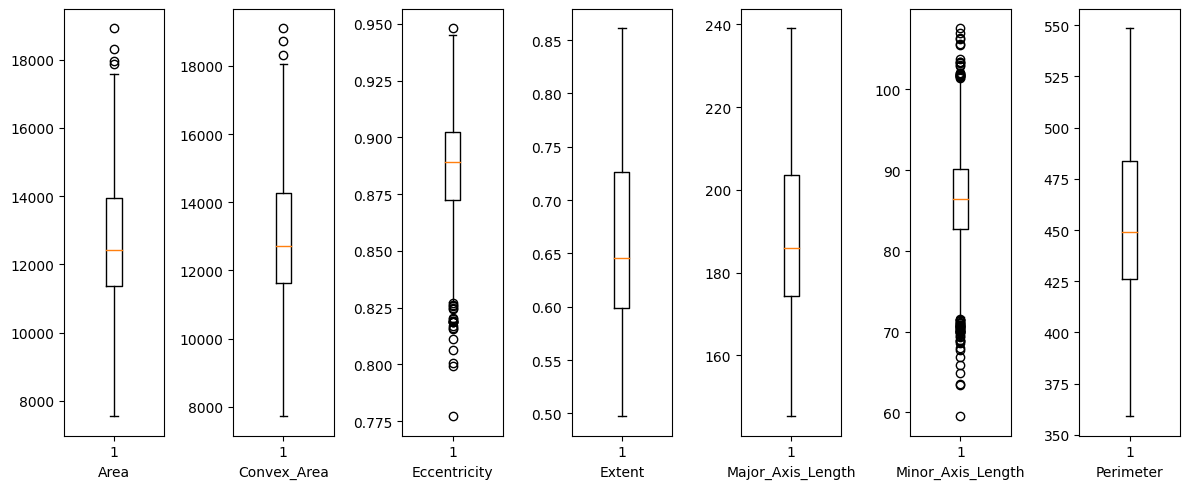

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 7, figsize=(12, 5))

# Create boxplots for each feature
for item in range(7):
  axs[item].boxplot(data[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

In [ ]:
for item in features:
  Q1 = data[item].quantile(0.25)
  Q3 = data[item].quantile(0.75)
  IQR = Q3 - Q1

  # Calculation for lower and upper bound
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  # Identification of the outliers' index in the dataset
  filtered = data[(data[item] >= lower_bound) & (data[item] <= upper_bound)]

  # Creating a set of data WITHOUT the outlieers
  data = filtered

clean_data = data

# Creation of new dataframe that is free from outliers
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3724 entries, 0 to 3808
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3724 non-null   float64
 1   Perimeter          3724 non-null   float64
 2   Major_Axis_Length  3724 non-null   float64
 3   Minor_Axis_Length  3724 non-null   float64
 4   Eccentricity       3724 non-null   float64
 5   Convex_Area        3724 non-null   float64
 6   Extent             3724 non-null   float64
 7   Class              3724 non-null   float64
dtypes: float64(8)
memory usage: 261.8 KB


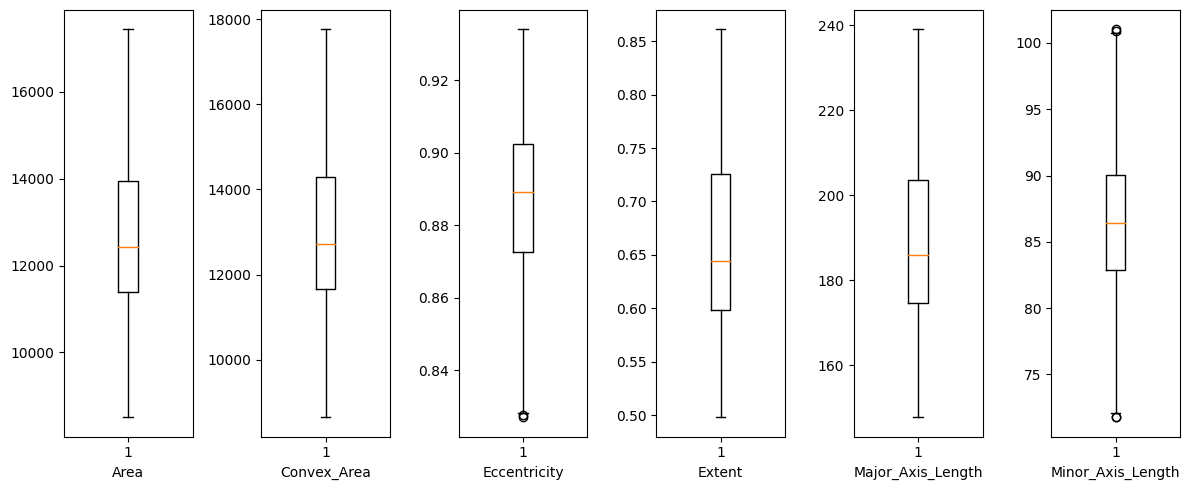

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

# Create boxplots for each feature
for item in range(6):
  axs[item].boxplot(data[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

After removing the most of the outliers, we can now standardize our features to be a similar scale

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

features = clean_data.columns.difference(['Class'])

X = clean_data[list(features)].values
y = clean_data["Class"]

normalizer = StandardScaler()
X_norm = normalizer.fit_transform(X)

After standardizing we will now determine which features are most important

## Feature Engineering

Feature: 0, Score: 0.02303
Feature: 1, Score: 0.02438
Feature: 2, Score: 0.02663
Feature: 3, Score: 0.04813
Feature: 4, Score: 0.80435
Feature: 5, Score: 0.02069
Feature: 6, Score: 0.05279


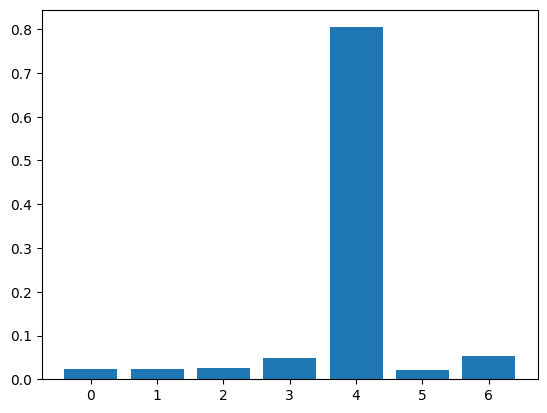

In [ ]:
from sklearn.ensemble import RandomForestRegressor # For Feature Importance
import matplotlib.pyplot as plt # For plotting

# Select the input and output
target = clean_data["Class"]
input = clean_data[list(features)]

# create the RFR model
model = RandomForestRegressor()
model.fit(input, target)

# Get the faeture importance
importance = model.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In this activity, I will be arbitrarily choosing the 4 most important features, which is Features (from most important to least important): 4, 6, 3, 2

In [ ]:
X_features = X_norm[:,[2, 3, 4, 6]]
X_features

array([[ 2.0892215 , -1.15188944,  2.36225947,  2.03064968],
       [ 0.41910991, -0.59851757,  0.98902864,  1.13621523],
       [ 1.25289747,  0.41379995,  1.4570023 ,  1.33104707],
       ...,
       [-2.0531087 ,  0.42706445, -1.22767552, -0.9497224 ],
       [-0.29232984, -0.45149779, -0.30997486, -0.34589061],
       [-0.62848959, -0.03101205, -1.60503128, -1.78194122]])

In [ ]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3804    1.0
3805    1.0
3806    1.0
3807    1.0
3808    1.0
Name: Class, Length: 3724, dtype: float64

## Model Creation

We can now proceed to creating the model for our neural network

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD


X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.10, random_state=11111)

np.random.seed(8)


model = Sequential([
         Dense(4, input_shape=(X_train.shape[1],), activation="relu"),
         Dense(3, activation="relu"),
         Dense(1, activation="sigmoid")
])

optimizer = SGD(learning_rate = 0.004)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 3)                 15        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
105/105 [==============================] - 69s 2ms/step - loss: 0.5264 - accuracy: 0.8081
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.8759
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.8962
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.9018
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.9075
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.9117
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.9123
Epoch 8/100
105/105 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.9144
Epoch 9/100
105/105 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.9173
Epoch 10/100
105/105 [==============================] - 0s 2ms/step - loss: 0.3628 - accur

In [ ]:
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

105/105 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9245
accuracy: 92.45%


After creating our base model, we will now proceed to the tasks given in the activity which includes:

- Saving and Loading the Model in the HDF5, JSON, and YAML formats.
- Checkpoing the model for Model improvement and Best Model
- Loading a saved Neural Network
- Visualizing the Training using Keras History
- Application of Dropout Regularization on Visible and Hidden Layer
- Re-adjusting Learning Schedule based on Time and Drop

# Save Model in HDF5 Format

In [ ]:
!pip install h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save_weights("/content/drive/MyDrive/Emtech - Assignment 8.1/ hdf5_model.h5")
print("Saved model to disk")

Saved model to disk


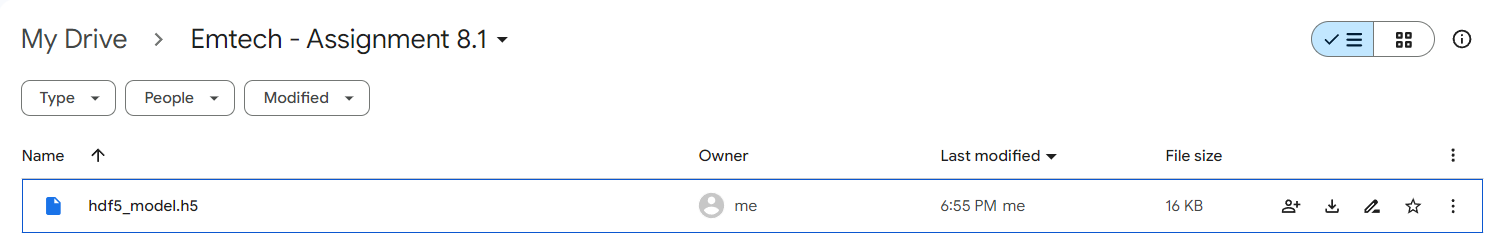

Here we can see that the model has been successfully written and saved on the drive folder

# Save Model in JSON Format

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Emtech - Assignment 8.1/json_model.h5")
print("Saved model to disk")

Saved model to disk


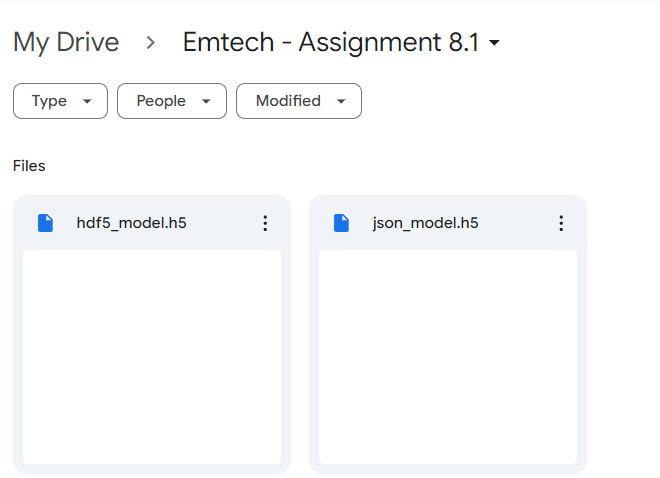

The JSON file has been successfully been written and saved

### Loading the Model

In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Emtech - Assignment 8.1/json_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 92.45%


You can also load the saved model from the Drive

# Save Model in YAML Format

In [ ]:
# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Emtech - Assignment 8.1/yaml_model.h5")
print("Saved model to disk")

Saved model to disk


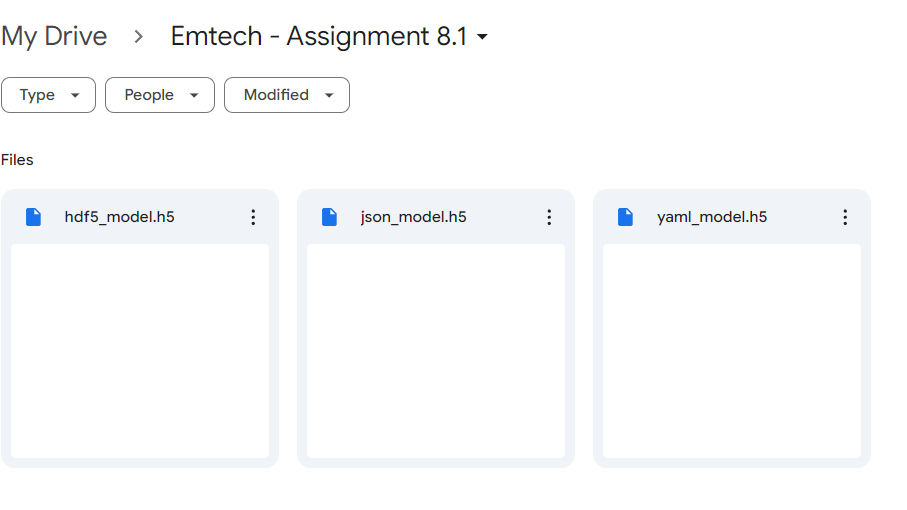

### Loading the MOdel

In [ ]:
from tensorflow.keras.models import model_from_yaml

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Emtech - Assignment 8.1/yaml_model.h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 92.45%


# Checkpoint Model Improvement

In [ ]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=32, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.92767, saving model to weights-improvement-01-0.93.hdf5

Epoch 2: val_accuracy did not improve from 0.92767


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy did not improve from 0.92767

Epoch 4: val_accuracy did not improve from 0.92767

Epoch 5: val_accuracy did not improve from 0.92767

Epoch 6: val_accuracy did not improve from 0.92767

Epoch 7: val_accuracy did not improve from 0.92767

Epoch 8: val_accuracy did not improve from 0.92767

Epoch 9: val_accuracy did not improve from 0.92767

Epoch 10: val_accuracy did not improve from 0.92767

Epoch 11: val_accuracy did not improve from 0.92767

Epoch 12: val_accuracy did not improve from 0.92767

Epoch 13: val_accuracy did not improve from 0.92767

Epoch 14: val_accuracy did not improve from 0.92767

Epoch 15: val_accuracy did not improve from 0.92767

Epoch 16: val_accuracy did not improve from 0.92767

Epoch 17: val_accuracy did not improve from 0.92767

Epoch 18: val_accuracy did not improve from 0.92767

Epoch 19: val_accuracy did not improve from 0.92767

Epoch 20: val_accuracy did not improve from 0.92767

Epoch 21: val_accuracy did not improve from 0.92767


In this simulation, the model did not improve from any of the checkpoints

# Checkpoint Best Model

In [ ]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=32, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.89829, saving model to weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.89829 to 0.90561, saving model to weights.best.hdf5

Epoch 3: val_accuracy improved from 0.90561 to 0.91212, saving model to weights.best.hdf5

Epoch 4: val_accuracy improved from 0.91212 to 0.91701, saving model to weights.best.hdf5

Epoch 5: val_accuracy improved from 0.91701 to 0.92107, saving model to weights.best.hdf5

Epoch 6: val_accuracy improved from 0.92107 to 0.92433, saving model to weights.best.hdf5

Epoch 7: val_accuracy improved from 0.92433 to 0.92514, saving model to weights.best.hdf5

Epoch 8: val_accuracy improved from 0.92514 to 0.92596, saving model to weights.best.hdf5

Epoch 9: val_accuracy did not improve from 0.92596

Epoch 10: val_accuracy improved from 0.92596 to 0.92677, saving model to weights.best.hdf5

Epoch 11: val_accuracy did not improve from 0.92677

Epoch 12: val_accuracy did not improve from 0.92677

Epoch 13: val_accuracy did not improve from 0.92677

Epoch 14: val_accuracy improved from 0.92677 to 0.92840, sa

# Load Saved Model

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(X_train.shape[1],), kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(3, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

Created model and loaded weights from file


Similar to the previous task, you can also save and load a neural network from and to Google Drive

# Visualize Model Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


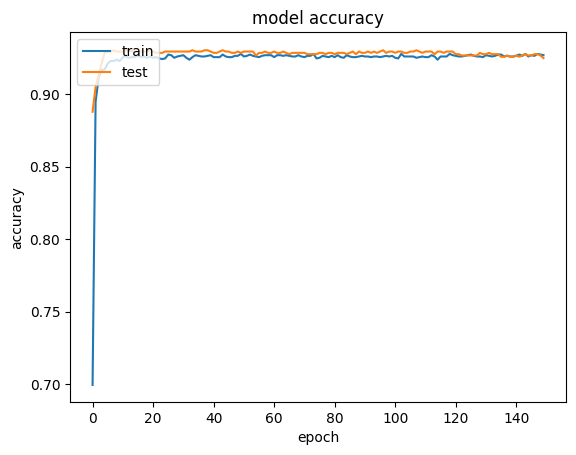

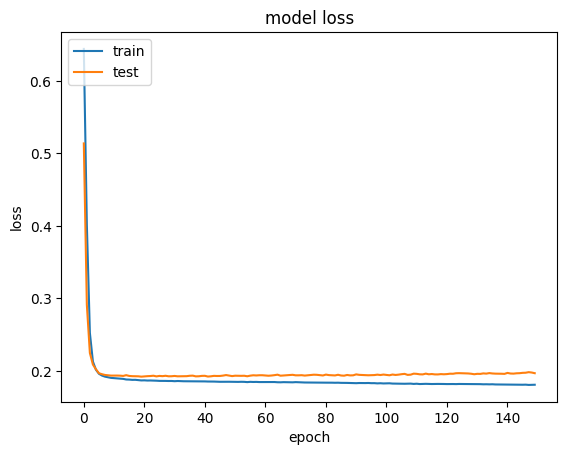

In [ ]:
# create model
model = Sequential([
         Dense(4, input_shape=(X_train.shape[1],), activation="relu"),
         Dense(3, activation="relu"),
         Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Dropout Regularization

In [ ]:
from keras.layers import Dropout

drop_reg_model = Sequential([
         Dense(4, input_shape=(X_train.shape[1],), activation="relu"),
         Dropout(0.05),
         Dense(3, activation="relu"),
         Dense(1, activation="sigmoid")
])

sgd_optimizer = SGD(learning_rate = 0.004)

drop_reg_model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

drop_reg_hist = drop_reg_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

train_loss, train_acc = drop_reg_model.evaluate(X_train, y_train)
test_loss, test_acc = drop_reg_model.evaluate(X_test, y_test)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_acc}")

12/12 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9249
Training Loss: 0.2240525782108307
Training Accuracy: 0.9256938099861145
Testing Loss: 0.2157481461763382
Testing Accuracy: 0.9249329566955566


# Dropout on Visible Layer

In [ ]:
from keras.layers import Dropout

vis_drop_model = Sequential([
         Dropout(0.05, input_shape=(X_train.shape[1],)),
         Dense(4, activation="relu"),
         Dense(3, activation="relu"),
         Dense(1, activation="sigmoid")
])

sgd_optimizer = SGD(learning_rate = 0.004, momentum=0.9)

vis_drop_model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

vis_drop_hist = vis_drop_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

train_loss, train_acc = vis_drop_model.evaluate(X_train, y_train)
test_loss, test_acc = vis_drop_model.evaluate(X_test, y_test)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_acc}")

12/12 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9303
Training Loss: 0.1869732290506363
Training Accuracy: 0.9268875122070312
Testing Loss: 0.18068449199199677
Testing Accuracy: 0.930294930934906


# Dropout on Hidden Layer

In [ ]:
from keras.layers import Dropout

hid_drop_model = Sequential([
         Dense(4, input_shape=(X_train.shape[1],), activation="relu"),
         Dense(3, activation="relu"),
         Dropout(0.05),
         Dense(1, activation="sigmoid")
])

sgd_optimizer = SGD(learning_rate = 0.004, momentum=0.9)

hid_drop_model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

hid_drop_hist = hid_drop_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

train_loss, train_acc = hid_drop_model.evaluate(X_train, y_train)
test_loss, test_acc = hid_drop_model.evaluate(X_test, y_test)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_acc}")

12/12 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9276
Training Loss: 0.19624915719032288
Training Accuracy: 0.9253954291343689
Testing Loss: 0.1909520924091339
Testing Accuracy: 0.9276139140129089


# Time-based Learning Rate Schedule

In [ ]:
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dropout

time_model = Sequential([
         Dense(4, input_shape=(X_train.shape[1],), activation="relu"),
         Dense(3, activation="relu"),
         Dropout(0.05),
         Dense(1, activation="sigmoid")
])

epochs=100
learning_rate=0.004
momentum=0.9
decay=learning_rate/epochs

sgd_optimizer = SGD(learning_rate = learning_rate, momentum=momentum, decay=decay, nesterov=False)

time_model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

time_hist = time_model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)

train_loss, train_acc = time_model.evaluate(X_train, y_train)
test_loss, test_acc = time_model.evaluate(X_test, y_test)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_acc}")

12/12 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9303
Training Loss: 0.18707682192325592
Training Accuracy: 0.9262906312942505
Testing Loss: 0.18319423496723175
Testing Accuracy: 0.930294930934906


# Drop-based Learning Rate Schedule

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import math

time_model = Sequential([
         Dense(4, input_shape=(X_train.shape[1],), activation="relu"),
         Dense(3, activation="relu"),
         Dropout(0.05),
         Dense(1, activation="sigmoid")
])


sgd_optimizer = SGD(learning_rate = 0.004, momentum=0.9)

time_model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

time_hist = time_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks_list, verbose=0)

train_loss, train_acc = time_model.evaluate(X_train, y_train)
test_loss, test_acc = time_model.evaluate(X_test, y_test)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_acc}")

12/12 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9330
Training Loss: 0.19408559799194336
Training Accuracy: 0.9271858930587769
Testing Loss: 0.19471357762813568
Testing Accuracy: 0.9329758882522583


# Conclusion

In this activity, I have managed to complete all of the tasks and observe its effect on the model and training. I have can see that there are more parameters in training a neural network than what was previously done in previous activities, such as dropout and re-adjustment of learning rate, as well as checkpoints.

The following tasks has been done in this activity:
- Load the dataset from an external source
- Perform pre-processing on the dataset
- Save a sample model in HDF5 Format
- Save and load a sample model in JSON format
- Save and load a sample model in YAML Format
- Use checkpoints to determine when a model improves or learns, and get the best model
- Load a saved Neural Network Model
- Visualize Model Training using Keras
- Using Dropout Regularization and apply it on the Visible Layer and Hidden Layer
- Apply both Time-based and Drop-based Learning Rate Schedules